Se accedio al repositorio del Sequence Read Archive (SRA) y se descargó el genoma completo de Lactobacillus strains (SRR23493799), corrida SRX19387392, número de librería 92117_i3.

In [ ]:
%%bash
conda create -n ensamble
conda activate ensamble

conda install -c bioconda fastqc, trimmomatic, abyss, spades

Posteriormente el archivo se subióa a apolo. Se descomprimió y se corrio el analisis de calidad.

In [ ]:
%%bash
scp SRR23493799.fastq.gz jduran11@apolo.eafit.edu.co:/home/jduran11/Ensamble

gzip -d SRR23493799.fastq.gz

fastqc SRR23493799.fastq

El archivo HTML de salida se descargó a mi equipo desde la terminal de linux fuera de apolo y se abrió el archivo en el navegador

In [ ]:
%%bash
scp jduran11@apolo.eafit.edu.co:/home/jduran11/Ensamble/SRR23493799_fastqc.html .

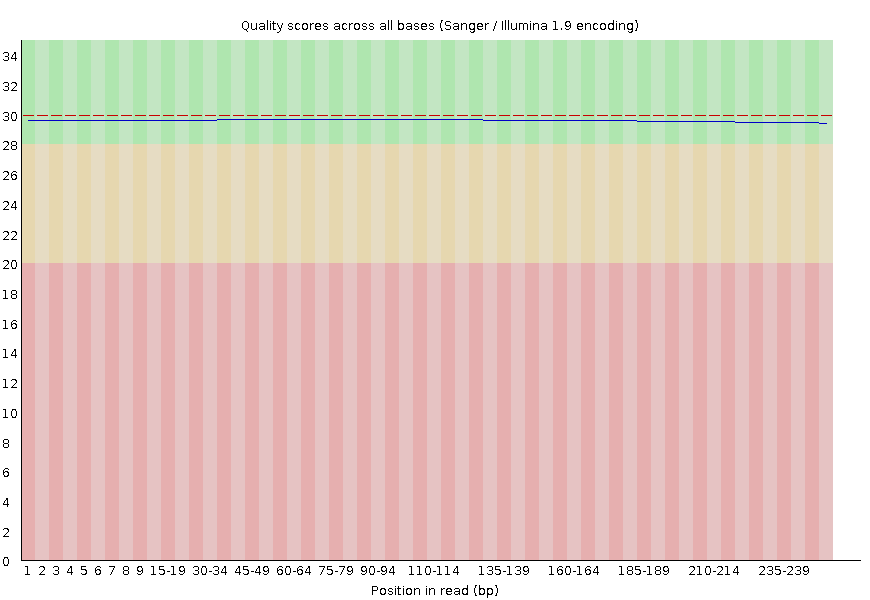

Despues se cortaron los reads con el argumento MINLEN y sin este para determinar su influencia en la cantidad de datos de salida, en donde se evidenció poca diferencia (98.73% de Surviving con MINLEN y 98.74% sin MINLEN) por lo que se procede con el archivo de salida que contubo este argumento.

In [ ]:
%%bash
trimmomatic SE -phred33 SRR23493799.fastq trimmed.fastq SLIDINGWINDOW:4:20 MINLEN:25

trimmomatic SE -phred33 SRR23493799.fastq trimmed_1.fastq SLIDINGWINDOW:4:20

Se chequéo la calidad despues del trimado y se observa el html de salida

In [ ]:
%%bash
fastqc trimmed.fastq

scp jduran11@apolo.eafit.edu.co:/home/jduran11/Ensamble/SRR23493799_fastqc.html .

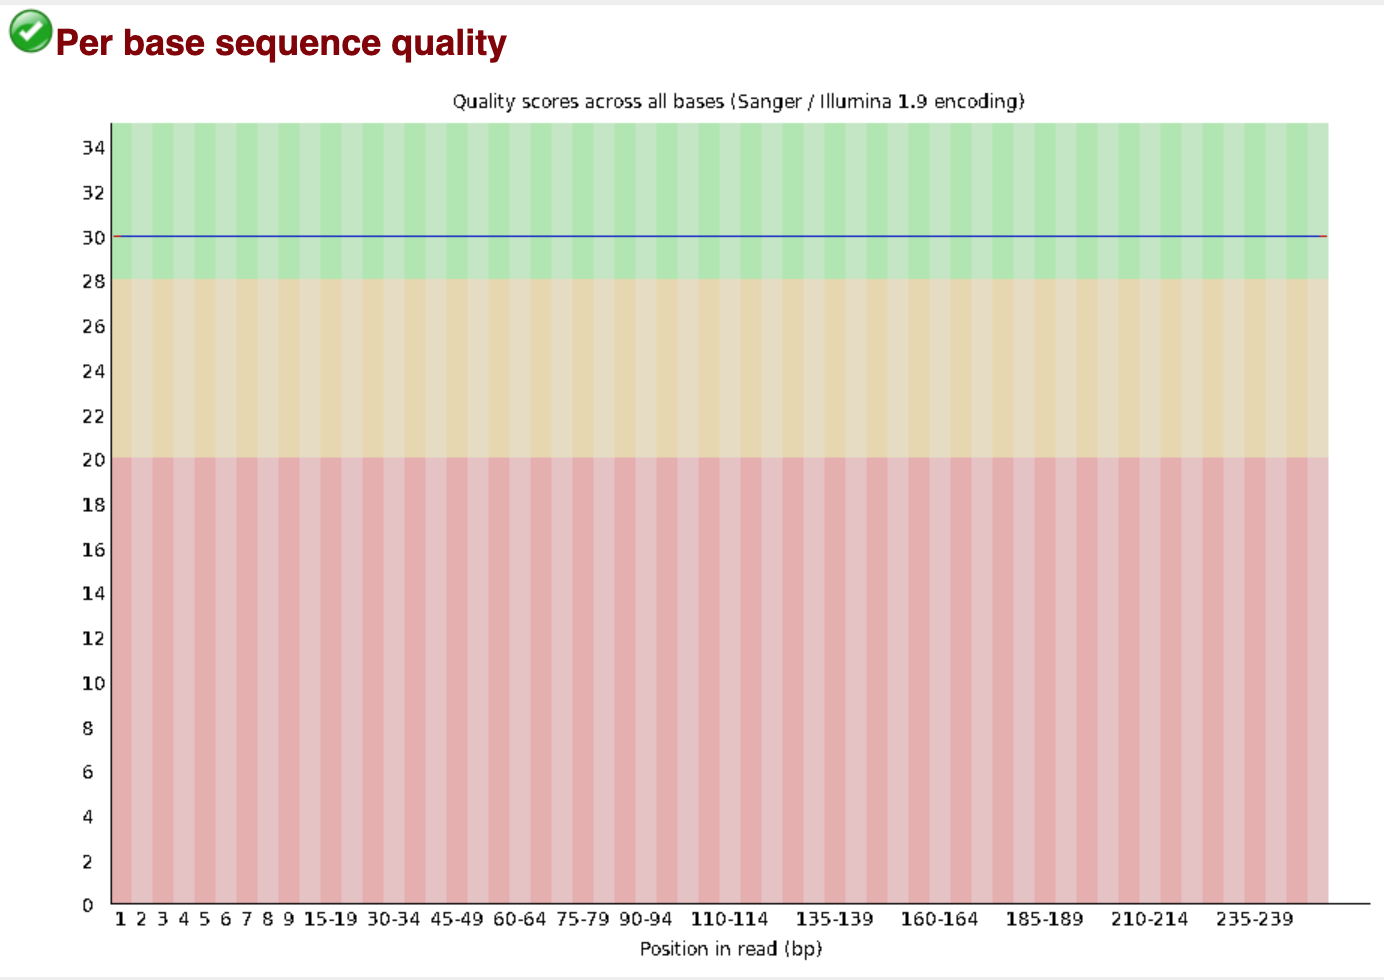

Se realizó el ensamble en ABySS anssembly con K=33 y se observó el resultado

In [ ]:
%%bash
abyss-pe k=33 se=trimmed.fastq name=Asembly33 "unitigs"
abyss-fac Asembly33-unitigs.fa

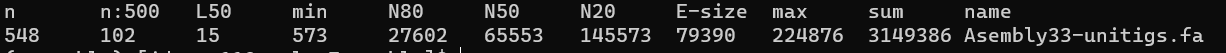

Se realizó el ensamble en ABySS anssembly con K=63 y se observó el resultado

In [ ]:
%%bash
abyss-pe k=63 se=trimmed.fastq name=Asembly63 "unitigs"
abyss-fac Asembly63-unitigs.fa

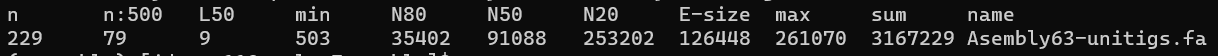

Se compararon los ensamblajes con el reportado en: https://www.ncbi.nlm.nih.gov/assembly/GCA_028462565.1 

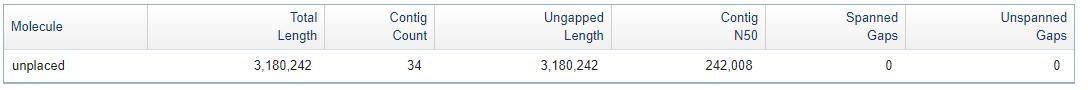

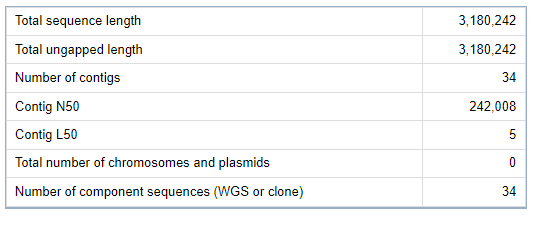

Basandose en el N50 parece ser que a mayor valor de kmeros más cerca estamos del proyecto oficial